### ANOVA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf

%precision 3
%matplotlib inline

In [3]:
# 데이터 불러오기
food1 = pd.read_csv('c:/data/pj/food_clean+remove_outlier_수정.csv')
food1.head()

,Lot_ID,Line,Shift,Operator,Temp,Humidity,Defect,Defect_Type,Weight
0,L003,A,주간,O8,26.4,42.9,0,양품,100.190255
1,L029,B,주간,O2,24.3,57.7,0,양품,98.952307
2,L035,A,주간,O4,23.5,44.3,0,양품,99.997581
3,L018,A,야간,O9,26.5,44.4,0,양품,100.536753
4,L020,B,주간,O9,27.2,55.9,1,인쇄불량,98.838464


In [4]:
from statsmodels.formula.api import ols        # 회귀분석 기반
from statsmodels.stats.anova import anova_lm   # 분산분석

# 소수점 제한
pd.options.display.float_format = "{:.3f}".format

In [5]:
#중량 <> 온도 <> 습도 <> 작업자 --> ANOVA 분석
model_2 = ols('Weight ~ C(Line)*C(Operator)', food1).fit()
anova_lm(model_2)

,df,sum_sq,mean_sq,F,PR(>F)
C(Line),2.000,1.716,0.858,1.098,0.335
C(Operator),9.000,4.135,0.459,0.588,0.807
C(Line):C(Operator),18.000,12.318,0.684,0.875,0.609
Residual,366.000,286.155,0.782,NaN,NaN


In [6]:
food1['residual'] = model_2.resid       # 잔차
food1['fitted'] = model_2.fittedvalues  # 적합치
food1.head()

,Lot_ID,Line,Shift,Operator,Temp,Humidity,Defect,Defect_Type,Weight,residual,fitted
0,L003,A,주간,O8,26.400,42.900,0,양품,100.190,0.640,99.550
1,L029,B,주간,O2,24.300,57.700,0,양품,98.952,-1.284,100.236
2,L035,A,주간,O4,23.500,44.300,0,양품,99.998,0.001,99.997
3,L018,A,야간,O9,26.500,44.400,0,양품,100.537,0.892,99.645
4,L020,B,주간,O9,27.200,55.900,1,인쇄불량,98.838,-1.058,99.896


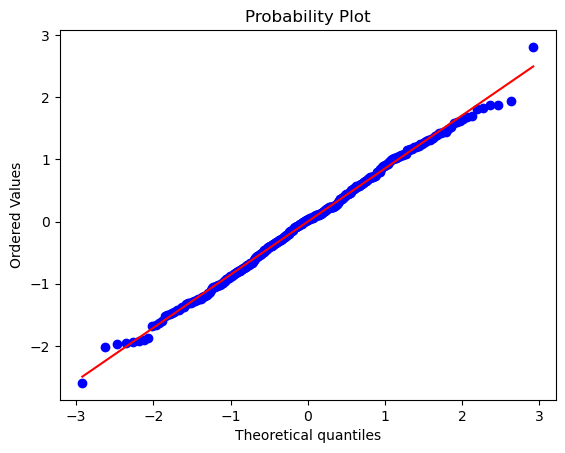

In [7]:
# 정규성 확인

stats.probplot(food1['residual'], plot = plt)
plt.show()

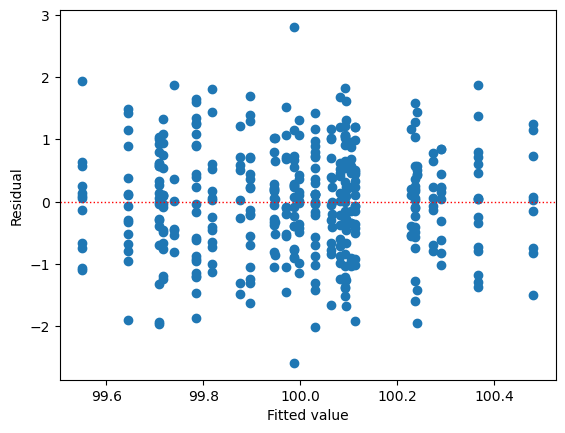

In [8]:
# 등분산성 확인

plt.scatter(food1['fitted'], food1['residual'])
plt.axhline(y=0, color = 'r', linewidth = 1, linestyle = 'dotted')
plt.xlabel('Fitted value')
plt.ylabel('Residual')
plt.show()

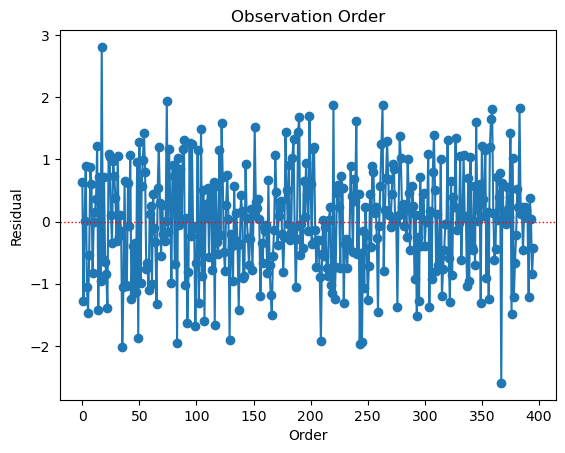

In [9]:
# 독립성 확인

plt.scatter(food1.index, food1['residual'])                       # 잔차를 관측 순서에 따라 
plt.plot(food1['residual'])                                       # 선 그래프 그리는 함수
plt.axhline(y=0, color = 'r', linewidth = 1, linestyle = 'dotted')    
plt.title("Observation Order")
plt.xlabel('Order')
plt.ylabel('Residual')
plt.show()

### 회귀분석

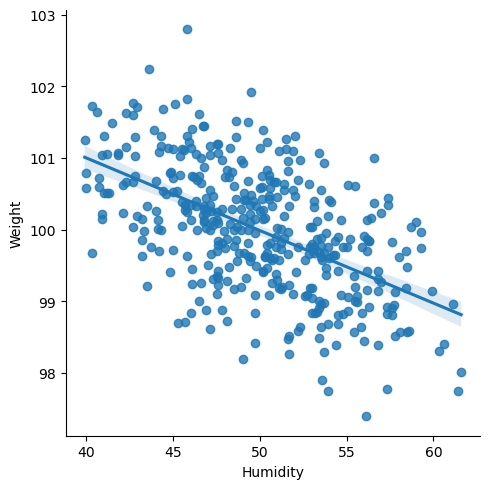

In [10]:
# 두 변수 간에 관계 파악
# sns.lmplot : 산점도에 회귀직선 추가 
sns.lmplot(x = 'Humidity', y = 'Weight', data = food1)
plt.show()

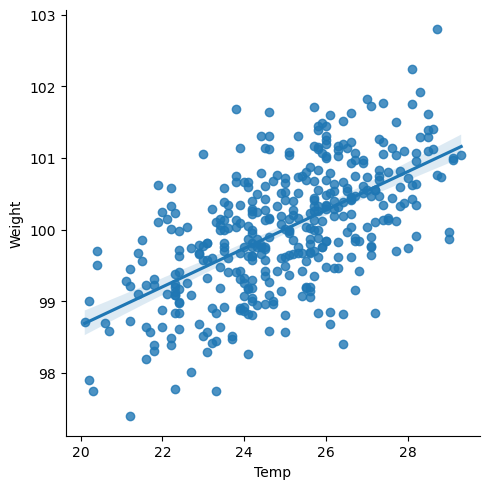

In [11]:
# 두 변수 간에 관계 파악
# sns.lmplot : 산점도에 회귀직선 추가 
sns.lmplot(x = 'Temp', y = 'Weight', data = food1)
plt.show()

In [12]:
# 단순 회귀분석 수행

import statsmodels.formula.api as smf
reg = smf.ols('Weight ~ Temp', food1).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     220.1
Date:                Tue, 09 Sep 2025   Prob (F-statistic):           7.12e-40
Time:                        21:37:59   Log-Likelihood:                -421.88
No. Observations:                 396   AIC:                             847.8
Df Residuals:                     394   BIC:                             855.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     93.2987      0.453    206.118      0.000      92.409      94.189
Temp           0.2682      0.018     14.836      0.000       0.233       0.304
==============================================================================
Omnibus:                        0.755   Durbin-Watson:                   1.854
Prob(Omnibus):                  0.686   Jarque-Bera (JB):                0.833
Skew:                          -0.020   Prob(JB):                        0.659
Kurtosis:                       2.779   Cond. No.                         321.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
# 단순 회귀분석 수행

import statsmodels.formula.api as smf
reg = smf.ols('Weight ~ Humidity', food1).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     164.5
Date:                Tue, 09 Sep 2025   Prob (F-statistic):           1.05e-31
Time:                        21:38:01   Log-Likelihood:                -440.70
No. Observations:                 396   AIC:                             885.4
Df Residuals:                     394   BIC:                             893.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    105.0478      0.396    265.369      0.000     104.270     105.826
Humidity      -0.1012      0.008    -12.824      0.000      -0.117      -0.086
==============================================================================
Omnibus:                        0.457   Durbin-Watson:                   2.191
Prob(Omnibus):                  0.796   Jarque-Bera (JB):                0.578
Skew:                          -0.040   Prob(JB):                        0.749
Kurtosis:                       2.831   Cond. No.                         535.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
# 다중회귀분석
print(food1.loc[:,['Temp','Humidity','Weight',]].corr())

          Temp  Humidity  Weight
Temp     1.000     0.076   0.599
Humidity 0.076     1.000  -0.543
Weight   0.599    -0.543   1.000


In [16]:
reg2 = smf.ols('Weight ~ Temp + Humidity', data=food1).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     472.2
Date:                Tue, 09 Sep 2025   Prob (F-statistic):          3.10e-105
Time:                        21:40:34   Log-Likelihood:                -267.29
No. Observations:                 396   AIC:                             540.6
Df Residuals:                     393   BIC:                             552.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     98.3058      0.385    255.531      0.000      97.549      99.062
Temp           0.2883      0.012     23.463      0.000       0.264       0.312
Humidity      -0.1103      0.005    -21.564      0.000      -0.120      -0.100
==============================================================================
Omnibus:                        0.829   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.646
Skew:                          -0.084   Prob(JB):                        0.724
Kurtosis:                       3.103   Cond. No.                         899.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#

### 데이터 개선 후